Import libraries

In [1]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score

XGBoost version check, I encountered some compatibility problems between my xgboost and sklearn versions

In [2]:
import xgboost
print(xgboost.__version__)

1.7.6


Loading the cleaned dataset (not log-transformed, also better for XGBoost)

In [ ]:
df = pd.read_csv('../data/clean_tree.csv')  
df.head()

,price,mileage,tax,mpg,engineSize,car_age,model_freq,brand_BMW,brand_Mercedes,brand_VW,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,11995.0,22606,30,57.6,1.4,9,709,False,False,False,True,False,False,False,True
1,6000.0,129680,30,64.2,2.0,12,734,False,False,False,True,False,False,False,False
2,13920.0,47576,20,67.3,2.0,9,2532,False,False,True,True,False,False,False,False
3,10600.0,30983,30,53.3,1.4,10,2532,False,False,True,True,False,False,False,True
4,21699.0,5229,145,43.5,1.5,6,2532,False,False,True,False,True,False,False,True


Preparing features and target, and splitting train and test sets

In [4]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Set model hyperparameters and fit model to data

In [5]:
xgb = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

_ = xgb.fit(X_train, y_train)  # 👈 this suppresses the buggy display

Predict on validation set

In [6]:
y_pred = xgb.predict(X_val)

Compute R^2 and RMSE to assess model's performance

In [7]:
from sklearn.metrics import root_mean_squared_error, r2_score

rmse = root_mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"XGBoost RMSE: ${rmse:.2f}")
print(f"XGBoost R² Score: {r2:.3f}")

XGBoost RMSE: $2024.35
XGBoost R² Score: 0.951


XGBoost RMSE: $2024.35 \
XGBoost R² Score: 0.951

Feature importance visualisation - top 15 features used by the model during for prediction

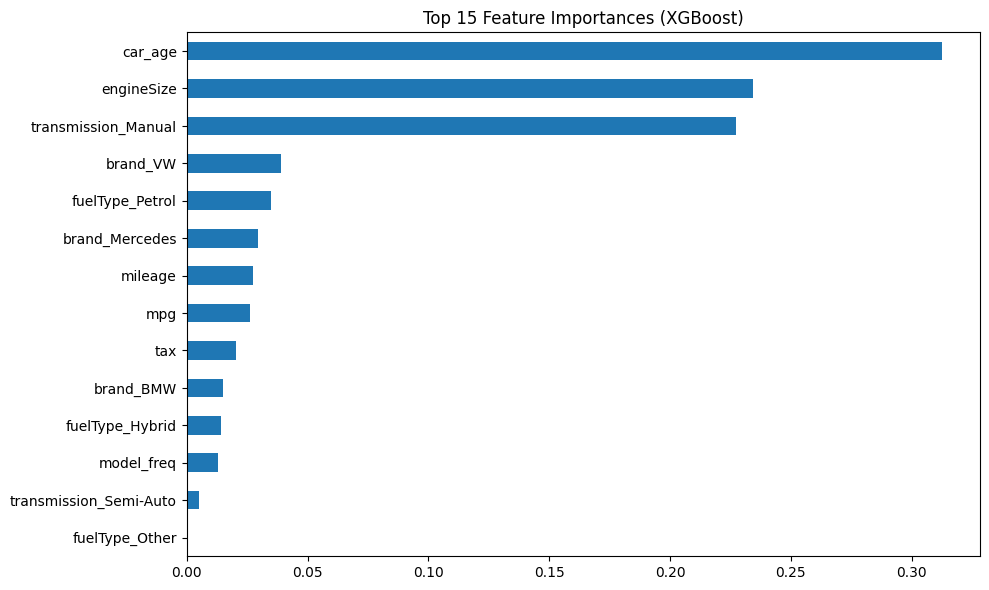

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Get importances
importance = pd.Series(xgb.feature_importances_, index=X.columns)
top_features = importance.sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title("Top 15 Feature Importances (XGBoost)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Saving the model

In [9]:

from joblib import dump

# Save the trained XGBoost model
dump(xgb, '../Results/xgboost_model.joblib')

['../Results/xgboost_model.joblib']